# Load and plot SPX and DJX data

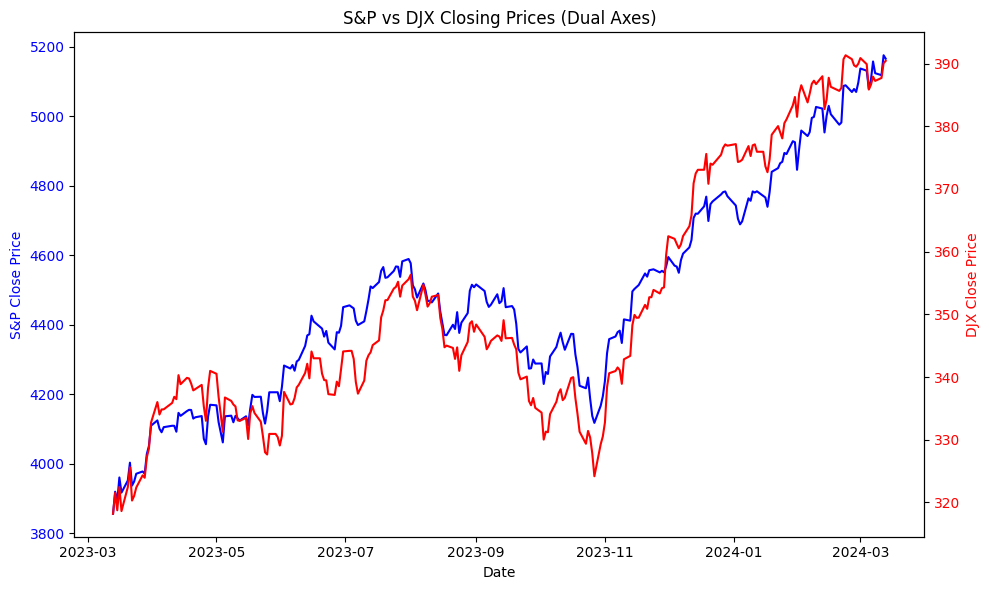

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
spx_df = pd.read_csv('INDEX_US_S&P US_SPX.csv')
djx_df = pd.read_csv('INDEX_XX_XCBO_DJX.csv')

# Convert the Date columns from string to datetime
spx_df['Date'] = pd.to_datetime(spx_df['Date'])
djx_df['Date'] = pd.to_datetime(djx_df['Date'])

# If necessary, adjust the Close column to remove commas and convert to float
spx_df['Close'] = spx_df['Close'].str.replace(',', '').astype(float)
djx_df['Close'] = djx_df['Close'].astype(float)  # Assuming DJX Close column doesn't have commas

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting S&P Index on the primary y-axis
ax1.plot(spx_df['Date'], spx_df['Close'], color='blue', label='S&P Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for the DJX Index
ax2 = ax1.twinx()  
ax2.plot(djx_df['Date'], djx_df['Close'], color='red', label='DJX Index')
ax2.set_ylabel('DJX Close Price', color='red') 
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title and adjusting the layout
plt.title('S&P vs DJX Closing Prices (Dual Axes)')
fig.tight_layout()  # To make sure everything fits without overlapping

plt.show()


# Basic Pairs Trading Strategy:

In [3]:
# Calculate the ratio of the closing prices
ratio = spx_df['Close'] / djx_df['Close']

# Calculate the historical mean and standard deviation of the ratio
mean_ratio = ratio.mean()
std_ratio = ratio.std()

# Determine entry points - 2 standard deviations from the mean
upper_threshold = mean_ratio + 2*std_ratio
lower_threshold = mean_ratio - 2*std_ratio

# Preparing for visualization and analysis in a later step
results = {
    'mean_ratio': mean_ratio,
    'std_ratio': std_ratio,
    'upper_threshold': upper_threshold,
    'lower_threshold': lower_threshold
}

results


{'mean_ratio': 12.704393957967463,
 'std_ratio': 0.2934585763006261,
 'upper_threshold': 13.291311110568715,
 'lower_threshold': 12.117476805366211}

# Execute Trades Based on Entry Points:
- If the ratio is above the upper threshold, the strategy would be to short the S&P index and go long on the DJX index, expecting the ratio to revert to the mean.
- If the ratio is below the lower threshold, the strategy would be to go long on the S&P index and short the DJX index, again expecting a reversion to the mean.

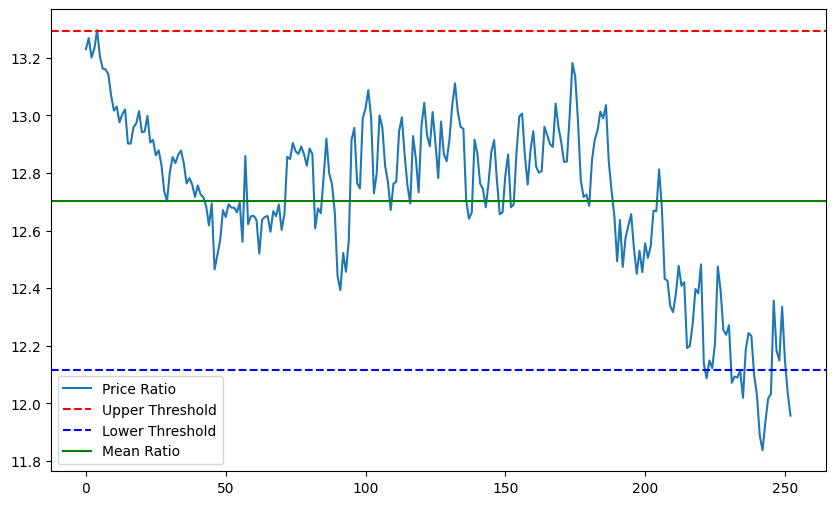

In [4]:
entry_points_upper = ratio[ratio > upper_threshold]
entry_points_lower = ratio[ratio < lower_threshold]

plt.figure(figsize=(10, 6))
plt.plot(ratio, label='Price Ratio')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='blue', linestyle='--', label='Lower Threshold')
plt.axhline(mean_ratio, color='green', linestyle='-', label='Mean Ratio')
plt.legend()
plt.show()